In [1]:
import pandas as pd

In [2]:
# Read a CSV file
data = pd.read_csv('../datasets/cleaned_loss_rate_dataset.csv')
# Display the dataframe
data.head(3)

,month,category_name,item_name,unit_selling_price_rmb/kg,loss_rate_(%),total_sales
0,1,capsicum,green hot peppers,8.256712,6.72,28.38
1,1,capsicum,green hot peppers,8.256712,6.72,15.48
2,1,flower,yunnan lettuces,6.000000,12.81,3.00


In [3]:
data.shape

(296979, 6)

In [4]:
# Assuming 'Loss Rate (%)' is the target variable
y = data['loss_rate_(%)']

# Select features for model training
numerical_columns = ['month', 'unit_selling_price_rmb/kg', 'total_sales']
categorical_columns = ['category_name', 'item_name']

In [5]:
# Extract numerical features
X_numerical = data[numerical_columns]

In [6]:
# Extract categorical features
X_categorical = data[categorical_columns]

In [7]:
# Apply one-hot encoding using pd.get_dummies for categorical variables
X_categorical_encoded = pd.get_dummies(X_categorical, columns=categorical_columns, drop_first=True)
X_categorical_encoded.sample(3)

,category_name_cabbage,category_name_capsicum,category_name_flower,category_name_mushroom,category_name_solanum,item_name_agaricus bisporus,item_name_aihao,item_name_amaranth,item_name_apricot bao mushroom,item_name_basil,...,item_name_yunnan leaf lettuce,item_name_yunnan lettuce,item_name_yunnan lettuces,item_name_yunnan shengcai,item_name_yuxingcao,item_name_yuxingcao,item_name_zhijiang qinggengsanhua,item_name_zhijiang red bolt,item_name_zhimaxiancai,item_name_zhuyecai
195286,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5229,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286789,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Concatenate numerical and encoded categorical features
X = pd.concat([X_numerical, X_categorical_encoded], axis=1)

In [9]:
X.shape

(296979, 159)

In [10]:
col = pd.DataFrame(X.columns)
col.head(3)

,0
0,month
1,unit_selling_price_rmb/kg
2,total_sales


In [11]:
col.to_csv('../datasets/column_names.csv', index=False)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((222734, 159), (74245, 159))

In [14]:
# Display the columns of X_test
print("\nColumns of X_test:")
print(X_test.columns)


Columns of X_test:
Index(['month', 'unit_selling_price_rmb/kg', 'total_sales',
       'category_name_cabbage', 'category_name_capsicum',
       'category_name_flower', 'category_name_mushroom',
       'category_name_solanum', 'item_name_agaricus bisporus',
       'item_name_aihao',
       ...
       'item_name_yunnan leaf lettuce', 'item_name_yunnan lettuce',
       'item_name_yunnan lettuces', 'item_name_yunnan shengcai',
       'item_name_yuxingcao', 'item_name_yuxingcao ',
       'item_name_zhijiang qinggengsanhua', 'item_name_zhijiang red bolt',
       'item_name_zhimaxiancai', 'item_name_zhuyecai'],
      dtype='object', length=159)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Round the MAE to 4 decimal places
rounded_mae = round(mae)

print(f"Mean Absolute Error (MAE): {rounded_mae}")

Mean Absolute Error (MAE): 0


In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print(f"MAE for Lasso Regression: {lasso_mae:.4f}")

MAE for Lasso Regression: 3.8872


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
print(f"MAE for Decision Tree Regressor: {dt_mae:.4f}")

MAE for Decision Tree Regressor: 0.0008


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Round the MSE to 4 decimal places
rounded_mse = round(mse, 4)

print(f"Mean Squared Error (MSE): {rounded_mse}")

Mean Squared Error (MSE): 0.0015


In [25]:
# Predict Loss Rate for the first 5 values in the test data
X_test_subset = X_test.head()
predictions = model.predict(X_test_subset)

# Display the results along with Month, Item Name, Category Name, and Discount information
result_df = pd.DataFrame({
    'month': data.loc[X_test_subset.index, 'month'],  # Assuming 'Month' is the original month numbers
    'Predicted Loss Rate (%)': predictions
})
result_df.head()

,month,Predicted Loss Rate (%)
135168,9,5.70
162269,11,14.43
287498,11,9.43
181023,1,11.60
228912,6,8.42


In [26]:
import matplotlib.pyplot as plt

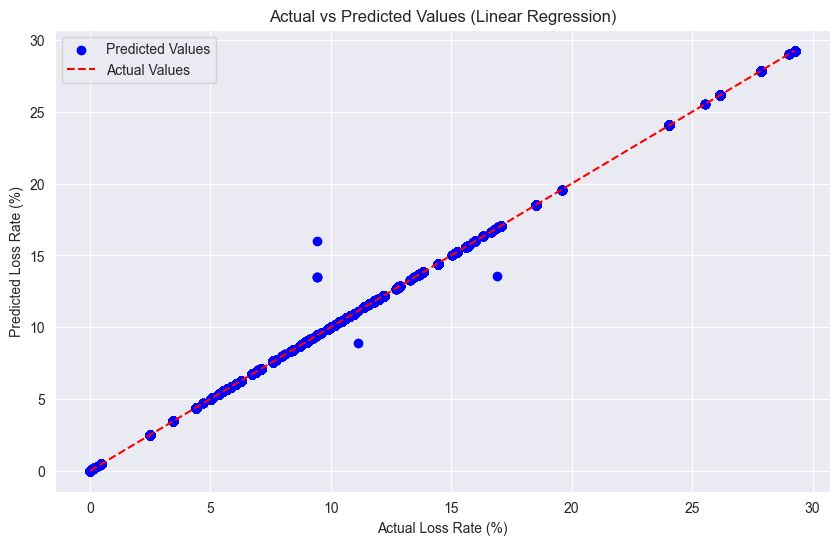

In [27]:
# Visualize actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

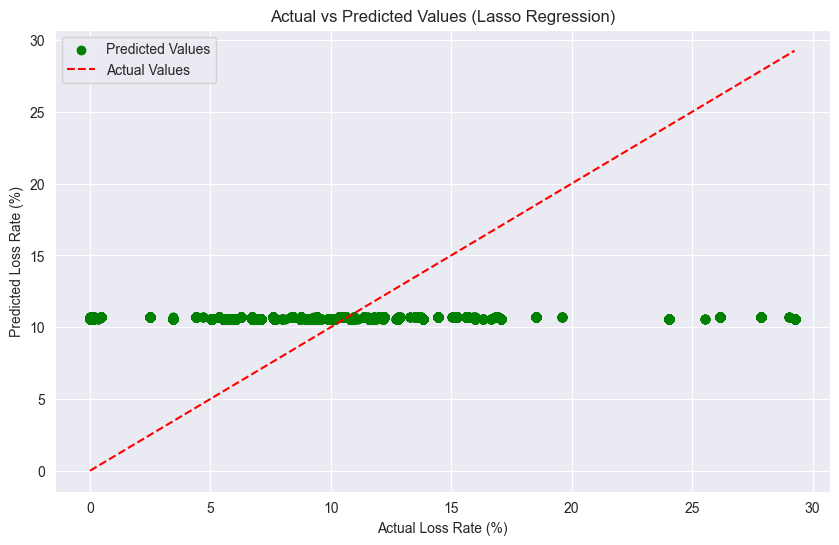

In [28]:
# Visualize actual vs predicted values for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_predictions, color='green', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.legend()
plt.show()


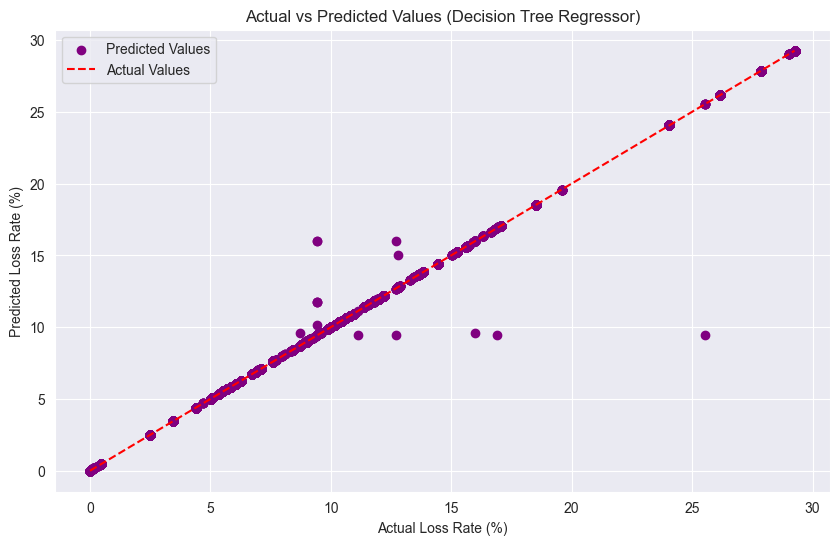

In [29]:
# Visualize actual vs predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='purple', label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual Values')
plt.xlabel('Actual Loss Rate (%)')
plt.ylabel('Predicted Loss Rate (%)')
plt.title('Actual vs Predicted Values (Decision Tree Regressor)')
plt.legend()
plt.show()

In [30]:
y_test[:5]

135168     5.70
162269    14.43
287498     9.43
181023    11.60
228912     8.42
Name: loss_rate_(%), dtype: float64

In [31]:
predictions[:5]

array([ 5.7 , 14.43,  9.43, 11.6 ,  8.42])

In [32]:
y_test.shape[0]

74245

In [33]:
import pickle

In [34]:
# save model
with open('../models/loss_rate_model.pickle', 'wb') as file:
    pickle.dump(model, file)